# Day 6

### Topics

1. Bit of a review
1. Plotting with style
1. Read in Image data with Stitch Image
1. Colors in images with Stitch Image
1. Goodness/badness histogram



First, import our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bit of a review

Recall last time we played around with uploading data with Pandas and making some plots, with style!

In [2]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

Our data formatting:

In [3]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

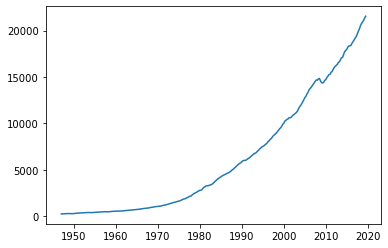

In [4]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.show()

Then we moved on to making plots in a slightly different way:

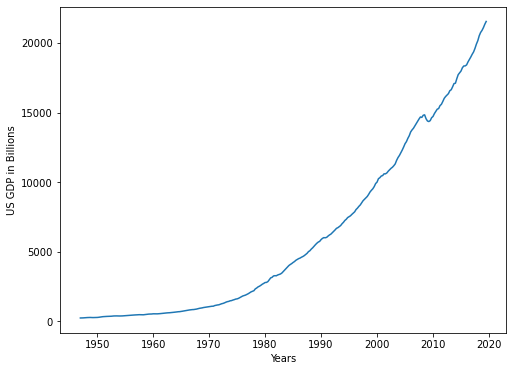

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,6)) # creating figure & axis objects

ax.plot(gdp['DATE'], gdp['GDP']) # plot now on the *axis object*
ax.set_xlabel('Years') # note the set_ in the front!
ax.set_ylabel('US GDP in Billions')

plt.show()

## Plotting with Style -- NOTE: we might wait until tomorrow to cover this!

Now we're going to talk about the "style" of the plot.  There are some defaults for things like the fonts/colors/etc used here.  This includes the default colormaps used in the plots and the order of colors, but 

What are available?

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's try a new one:

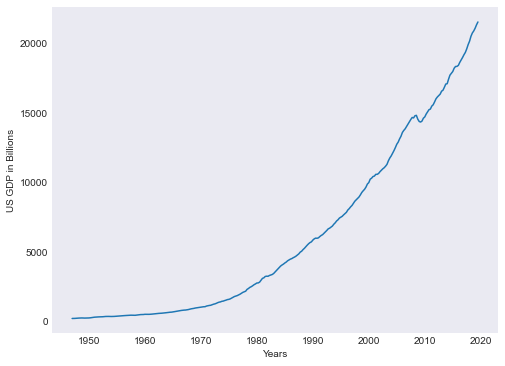

In [7]:
style = 'seaborn-dark'
plt.style.use(style)

fig, ax = plt.subplots(1,1,figsize=(8,6)) # creating figure & axis objects

ax.plot(gdp['DATE'], gdp['GDP']) # plot now on the *axis object*
ax.set_xlabel('Years') # note the set_ in the front!
ax.set_ylabel('US GDP in Billions')

plt.show()

So, that is neat but the only issue is now we are "stuck" with this style for the rest of our plots:

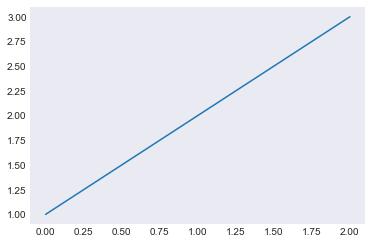

In [8]:
fig, ax = plt.subplots(1,1)

ax.plot([1,2,3])

plt.show()

Any generic plot now has the same colormaps & fonts associated with it.

To set it for just a single cell we can use the `with` keyword:

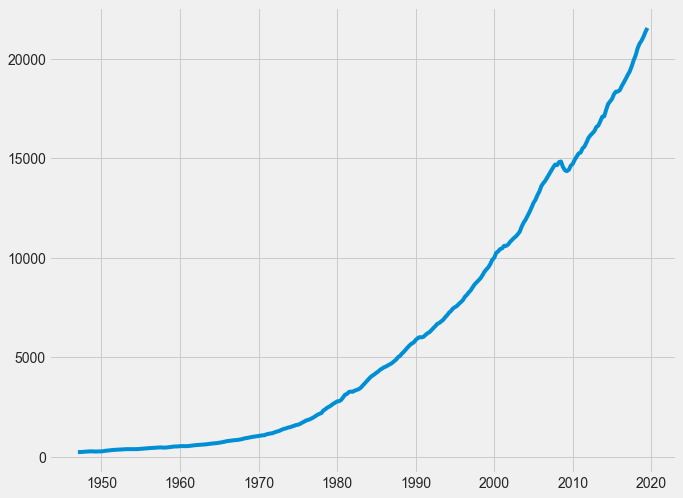

In [9]:
style = 'fivethirtyeight'
with plt.style.context(style): # here context means we'll plot *with this style but only in this context*
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(gdp["DATE"], gdp["GDP"], '-')
    plt.show()

We can even make a function to do this!

In [4]:
def make_gdp_plot(style): # note, "style" is something you can gooogle if you want more options
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: " + style) # append 'Style:' and whatever style we chose
        ax.plot(gdp["DATE"], gdp["GDP"], '-')
        plt.show()

Now we can run our function.  Let's remind ourselves of our choses:

In [5]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

And then we made a few plots:

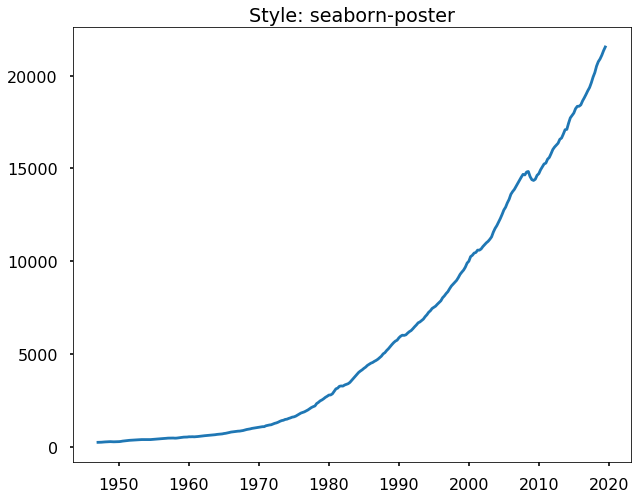

In [6]:
make_gdp_plot('seaborn-poster')  ## change

Today we are going to play with an image dataset (the Stitch Image) and use it to learn about color space.

More info about image datasets can be found on Week 01 & Week 02 of the grad-level course: https://uiuc-ischool-dataviz.github.io/spring2020/

## Read in Image data with Stitch Image

Make sure you have the pillow package installed with:

```python
!conda install -c anaconda pillow
```

Or through using the Anaconda GUI.

Let's use the pillow library and its `Image` interface to load an image:

In [10]:
import PIL.Image as Image # note here we are using the Image set of functions *within* the PIL library

Now we'll read in image file, here I'm assuming the stitch image is stored in the same directory as this notebook:

In [11]:
im = Image.open("stitch_reworked.png", "r")

Note, we can take a quick look at this image:

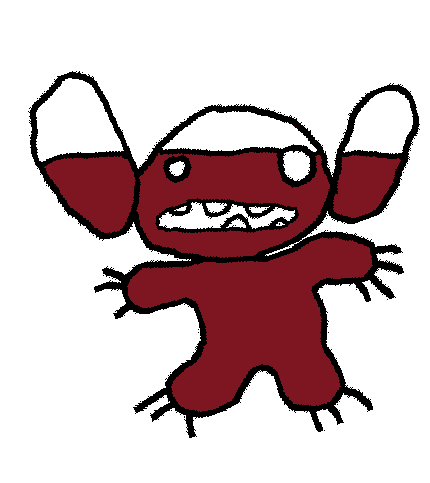

In [12]:
im

The `im` variable is sort of like a "fig" object in that there is a method to display it to the screen in a Jupyter Notebook.  Let's turn it into data:

In [13]:
data = np.array(im)

What is this data?

In [14]:
data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [15]:
data.shape

(483, 430, 4)

This data is an image that is 483x430 in shape and has 4 color channels.  Why 4 and not 3?  The 4th channel is opacity -- how see through the image is.  More on this in a moment.

Note we can also display this image with the `matplotlib` interface:

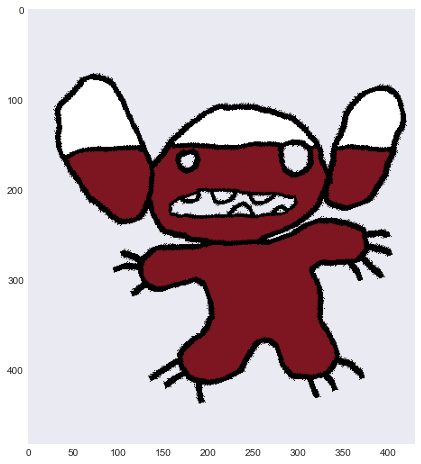

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.imshow(data)

plt.show()

We can see this way allows us to see some info about the # of pixels in the x/y directions.

Also, note that the y-direction starts at zero and *increases* going down.  This is common for data in an image format.

## Colors in images with Stitch Image

One question we might ask at this point is how many unique colors are there in this image?

We could try using `np.unique` to do this for us:

In [17]:
np.unique(data)

array([  0,  22,  33, 126, 255], dtype=uint8)

Hmmm, but we know we are supposed to have channels that are like RGB triplets.  By default, `np.unique` just looks for unique values across the entire data, so we have to be a little more careful.  Before we get into it, what we know there are 4 channels: these are RGBA:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/RGBA_comp.png">

This is a nice representation of how the "A", or *alpha-channel* changes the look of the image.  Here is a rainbow colormap with a checkered pattern behind it.  As the alpha-channel decreases we are able to see more and more of the checkered background.

So what we *really* want to see is the number of unique RGBA combinations.  

Let's first recall what the dimension of the data is:

In [18]:
data.shape

(483, 430, 4)

We might be tempted to try an "axis" argument:

In [19]:
len(np.unique(data, axis=0))

362

But that doens't really do what we want, so we have to be a little trickier.

Let's first see how many unique values are in each channel:

In [17]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0 126 255]
channel= G unique values= [  0  22 255]
channel= B unique values= [  0  33 255]
channel= A unique values= [  0 255]


So this is still not giving us unique combinations of colors but it is telling us some very interesting stuff!  Its saying for example, that there are likely very few colors because there are just not that many levels of any chanel (at most 3 of each).  And its telling us that there are places on the image that are either perfectly solid (the alpha channel = 255) or perfectly see-through (alpha channel = 0).

**ASIDE**

What we really want to do is change our 483x430x4 dataset into a list of RGBA combinations.  We can do this with `numpy.reshape` by saying "hey, let's collapse our dataset along the 3rd dimension -- index of 2":

In [20]:
data.reshape(-1, data.shape[2]) # if you're like 30% sure you get whats going on here, that is ok!!
# we'll actually use a function to do this calculation for us later on!

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [19]:
data.reshape(-1, data.shape[2]).shape

(207690, 4)

Now each pixel is represented by a row and we can, FINALLY, look for unique values along this first axis:

In [20]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

TahDah!  So, we see that ther are only 4 colors in this image and 1 is just a totally transparent color -- RGBA = [0,0,0,0].


**END ASIDE**

How to figure out where these colors are?  Let's first start by trying to visualize where the transparent stuff is.  While drawing a checkered pattern on the back of our image might be cool, we can also "set" a gray color to our background more easily and then plot on top of this with `matplotlib`.

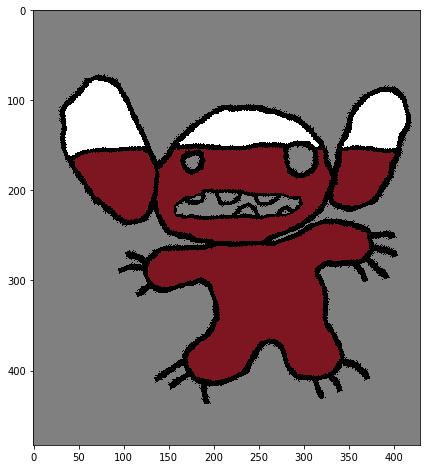

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

# plot on top!
ax.imshow(data)

plt.show()

What if I only wanted to plot the areas that are red regions?  Or change the red areas to blue?

We can do this by doing something called a "boolean mask" -- this is basically making an array of booleans (True or False) that will be true ONLY when the image is transparent.  Let's give this a shot:

In [22]:
image_boolean_mask = data[:,:,0] == 126 # from our understanding of RGB combinations this is the R channel that is redist

In [23]:
image_boolean_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

So, this is very much like doing a boolean mask for one value:

In [24]:
126 == 126

True

So, let's first turn these parts of the image blue by "resetting" their values to be 255 in the blue channel and 0 otherwise.

In [25]:
data[image_boolean_mask] = [0,0,255,255]

Finally, let's plot!

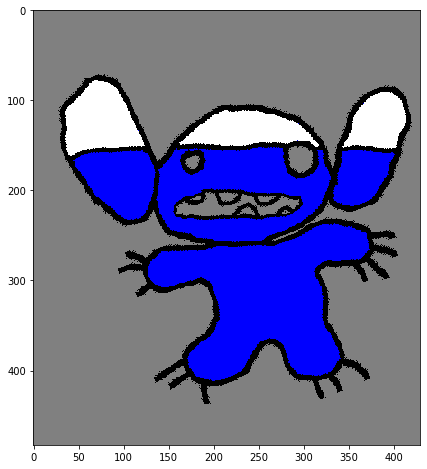

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

# plot on top!
ax.imshow(data)

plt.show()

A beautiful blue stitch!

You can also do more complex combinations of boolean searches for colors.  What we'll do now is use a "user-defined" library to do some of these manipulations for us. 

**GO THROUGH THIS IN DETAIL MAKE SURE FOLKS CAN DOWNLOAD**

Make sure the `image_manipulations.py` file is in your current directory, and do:

In [27]:
from image_manipulations import my_boolean_mask

This is a little function I wrote myself that I stored in an external library.  I put in some doc strings too so we can see a bit of info about this function:

In [28]:
my_boolean_mask?

Let's try it! Let's replace black lines by purple.  

**ASIDE**

We couldn't do this before -- why?  Let's look at our data again: 

In [29]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [  0,   0, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

If I tried to do a simple boolean mask with one of the channels for black -- [0,0,0,255] -- it would overlap with at least one more color so that won't work.  

**END ASIDE**

The function does a full set of boolean operations to take this into account (you can check out the function yourself if you are interested):

In [30]:
myMask = my_boolean_mask(data, [0,0,0,255])

This time, let's not overwrite our original image.  We can do this by copying the array:

In [31]:
newImageData = data.copy()

Now we can replace at will without changing the original data array!

In [32]:
newImageData[myMask] = [126, 0, 126, 255] # this will be a magenta looking thing!

Let's plot!

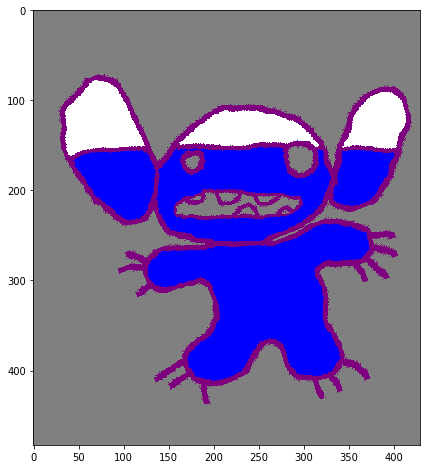

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

ax.imshow(newImageData)

plt.show()

Cool!  Now let's say we want to compare our modified image to the previous?  We can do this by making side by size figures with a slight modificaiton to our matplotlib call.  Remember we did this before for side-by-side plots, so let's review:

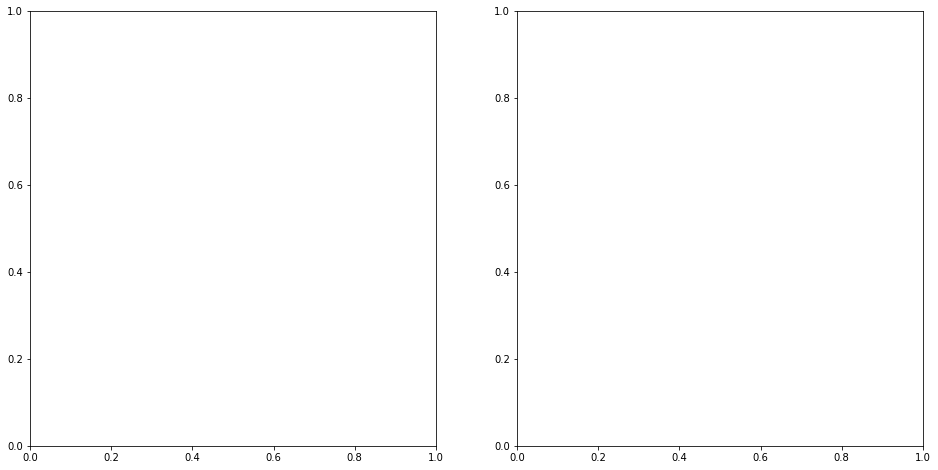

In [34]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

I haven't filled the figure with anything, just made some side-by-side plots.  We can try other configurations and even call it with the number of rows and columns explicitly:

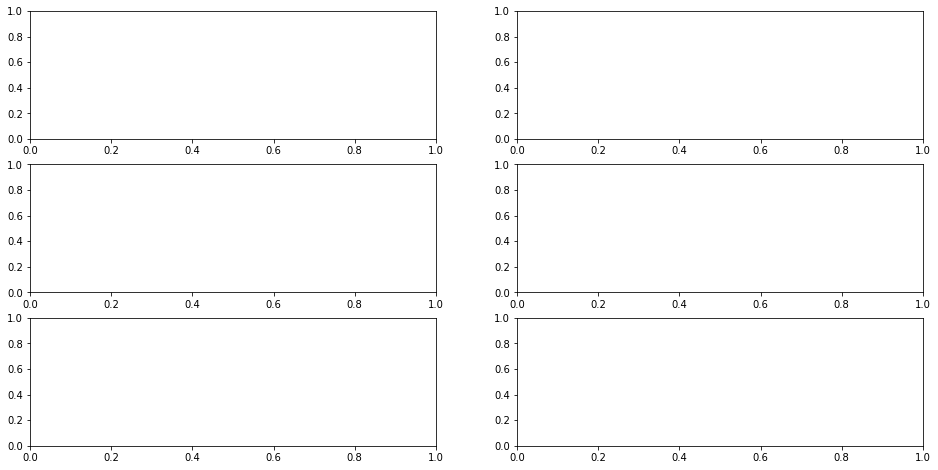

In [35]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(16,8))

Ok, let's go back to side by side plots:

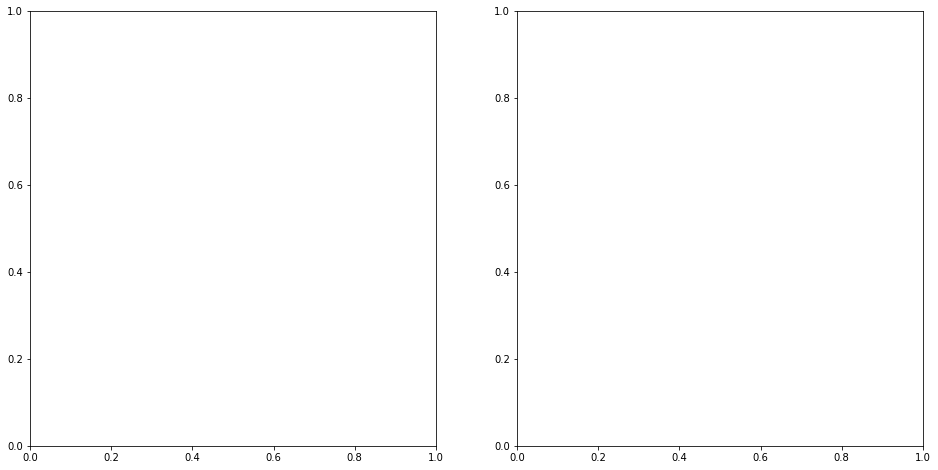

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

How do we access the different sets of axis?  Let's check what "ax" is now:

In [37]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe65066b0d0>,
      dtype=object)

`ax` is actually a an *array* of axis!  We can access these axes the same way we would with any array:

In [38]:
ax[0]

In [39]:
ax[1]

Ok, let's actually put images on our plot:

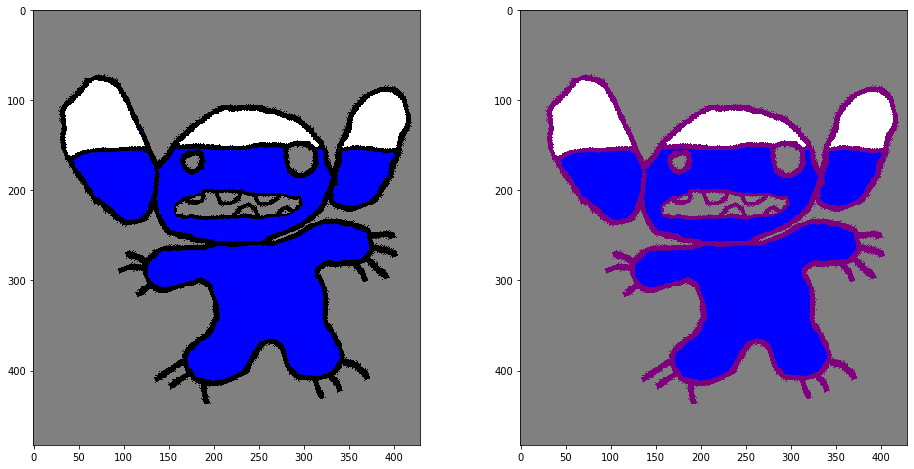

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

ax[0].set_facecolor('gray') # set background image
ax[0].imshow(data) # original

ax[1].set_facecolor('gray') # set background image
ax[1].imshow(newImageData)

plt.show()

We can even add labels/titles in the usual way:

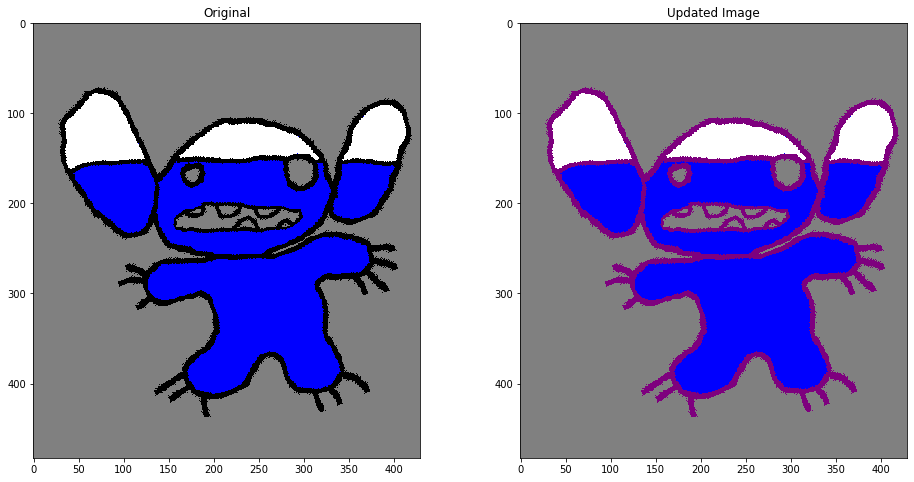

In [41]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

ax[0].set_facecolor('gray') # set background image
ax[0].imshow(data) # original
ax[0].set_title('Original')

ax[1].set_facecolor('gray') # set background image
ax[1].imshow(newImageData)
ax[1].set_title('Updated Image')

plt.show()

What if I just wanted to plot *just* the blue part and set the *rest* of the image to fully transparent?

Let's copy our dataset again:

In [42]:
onlyBlueData = data.copy()

And call a boolean mask for blues:

In [43]:
onlyBlueMask = my_boolean_mask(onlyBlueData, [0, 0, 255, 255])

What I want now is to turn all of the pixels that are *not* blue into transparent.  So I do this with a "NOT-mask" which is basically a little twiddle in front of the mask instead of the mask itself:

In [44]:
onlyBlueData[~onlyBlueMask] = [0,0,0,0]

Let's plot and see what we did:

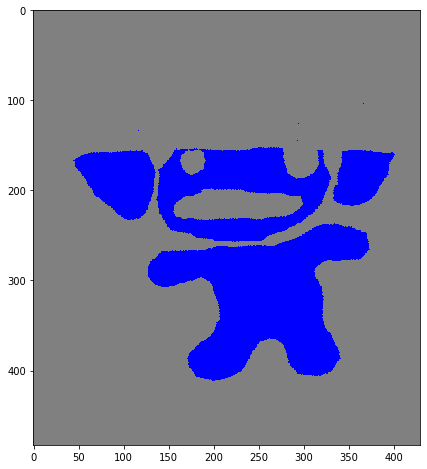

In [45]:
fig, ax = plt.subplots(1,1, figsize=(8,8)) # one fig again

ax.set_facecolor('gray') # set background image

ax.imshow(onlyBlueData)

plt.show()

## Goodness/badness histogram

Let's re-load our un-ultered image and take a quick look:

In [46]:
im = Image.open("stitch_reworked.png", "r")
data = np.array(im)

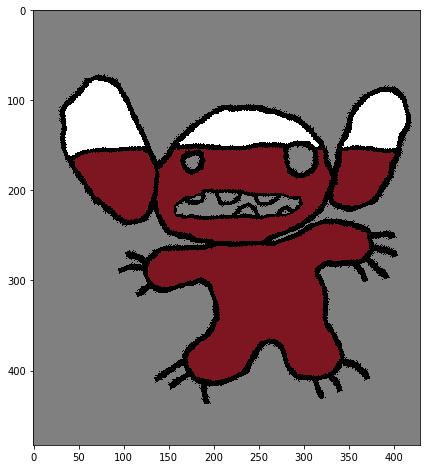

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,8)) # one fig again

ax.set_facecolor('gray') # set background image

ax.imshow(data)

plt.show()

So, when we first encountered this image we really wanted to measure the goodness and badness of Stitch, and now that we have masks we can do just this!  Let's grab the measurement of Stitch's goodness which is the white parts of his upper head and ears and the "bad" parts which are the maroon parts using our masking.

**ASIDE**

First, what are the different colors again?

In [48]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

**END ASIDE**

Ok, let's grab goodness and badness:

In [49]:
goodness_mask = my_boolean_mask(data, [255, 255, 255, 255])
badness_mask = my_boolean_mask(data, [126, 22, 33, 255])

And let's count pixels in each group:

In [50]:
npix_good = len(data[goodness_mask])
npix_bad = len(data[badness_mask])

In [51]:
npix_good, npix_bad

(11929, 40949)

We could calculate a quick percentage of Stitch's "goodness":

In [52]:
npix_good/(npix_good + npix_bad)

0.22559476530882408

So stitch is ~23% good.  But!  We can also make a histogram of this using a `matplotlib` bar-chart plot:

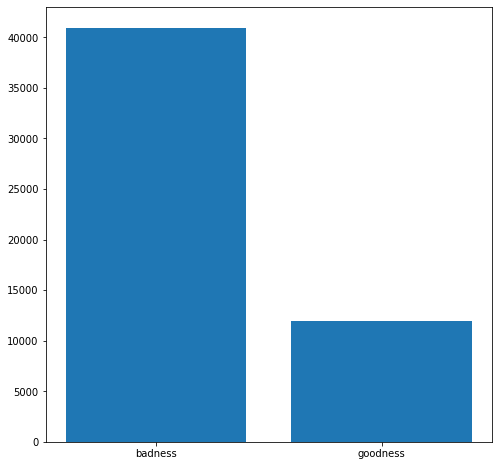

In [53]:
fig, ax = plt.subplots(figsize=(8,8))

# we'll turn these into arrays to make our lives easier down the road
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])

ax.bar(labels, values)

plt.show()

Ok this is fine, but wouldn't it be nice to be able to color these bars ourselves?  We can do this by accessing the bar-chart's colors and setting them one by one:

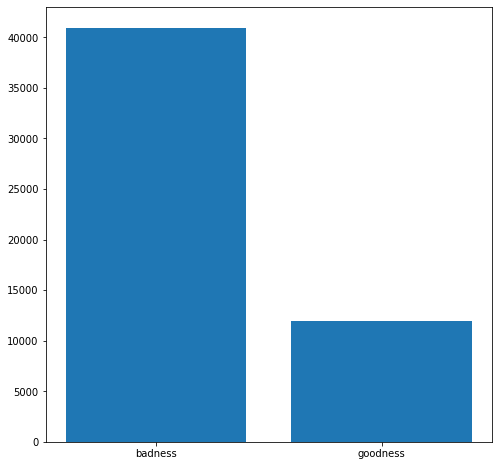

In [54]:
fig, ax = plt.subplots(figsize=(8,8))

# we'll turn these into arrays to make our lives easier down the road
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])

myBarChart = ax.bar(labels, values)

plt.show()

In [55]:
myBarChart

<BarContainer object of 2 artists>

In [56]:
myBarChart[0]

This is telling us we have 2 rectangles on this plot.  Let's do a for loop and use the `set_color` function to pick their colors:

In [57]:
colors = ['maroon', 'lightgray'] # set badness = maroon & goodness = light gray

# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])

Re-show this figure:

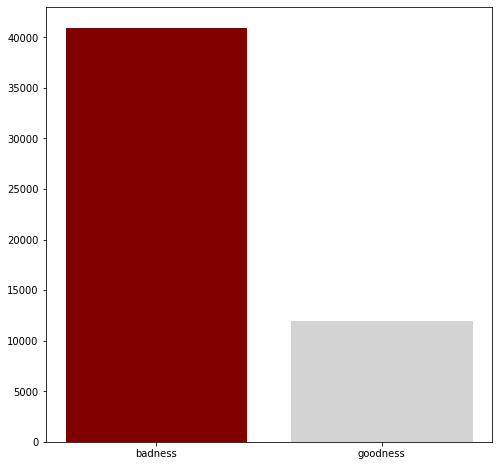

In [58]:
fig

We can also set the colors by their RGBA values instead (with a normalization to 0-1 colorspace):

In [59]:
colors = np.array([(126, 22, 33, 255), (255, 255, 255, 255)])

# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i]/255)

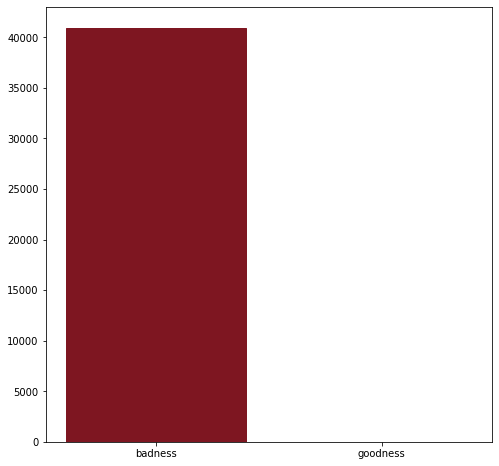

In [60]:
fig

Ah ha!  But we have an issue!  When we plot white we don't see the bar anymore.  We can alleviate this with adding a black line around both of our bars:

In [61]:
colors = np.array([(126, 22, 33, 255), (255, 255, 255, 255)])

# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i]/255)
    # for the edges
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

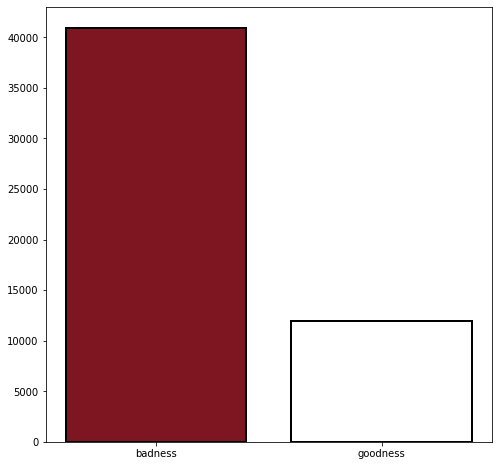

In [62]:
fig

Let's put all this code in one place:

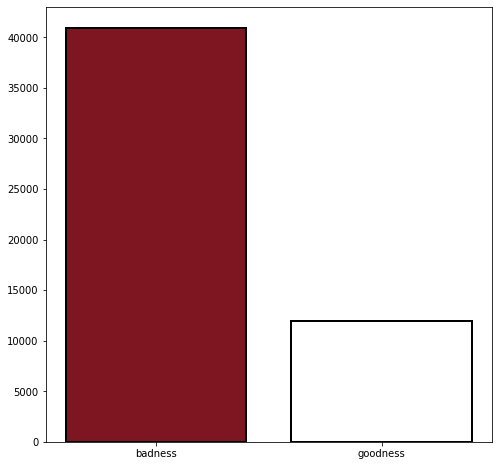

In [65]:
fig, ax = plt.subplots(figsize=(8,8))

# we'll turn these into arrays to make our lives easier down the road
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])
colors = np.array([(126, 22, 33, 255), (255, 255, 255, 255)])

myBarChart = ax.bar(labels, values)

# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i]/255)
    # for the edges
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

Of course, ideally, we'd like to do this for all colors in our image.  We can do this with another function in `image_manipulations.py`:

In [63]:
from image_manipulations import color_components

In [68]:
colors, color_labels, color_rgb_labels, npix_of_a_color = color_components(data)

`colors` gives the array of unique colors, already scaled to 0-1

In [72]:
colors

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0.49411765, 0.08627451, 0.12941176, 1.        ]),
 array([1., 1., 1., 1.])]

`color_rgb_labels` gives the labels in terms of rgb values:

In [73]:
color_rgb_labels

['0,0,0,0', '0,0,0,255', '126,22,33,255', '255,255,255,255']

And `npix_of_a_color` gives the number of pixels at each color:

In [74]:
npix_of_a_color

[135103, 19709, 40949, 11929]

Which we can use with much the same code we had before to make histograms:

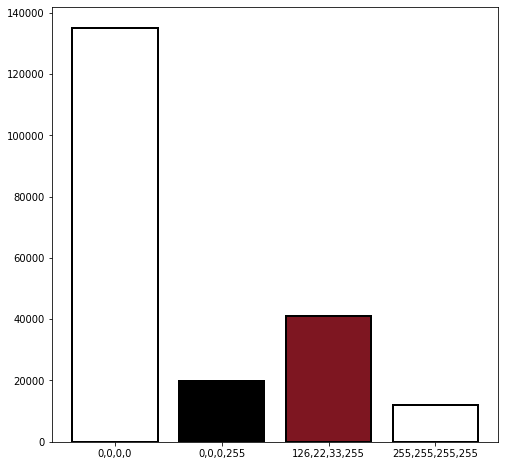

In [75]:
fig, ax = plt.subplots(figsize=(8,8))

myBarChart = ax.bar(color_rgb_labels, npix_of_a_color)

# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    # for the edges
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

This is a nice histogram of the color distribution of the Stitch image showing that most of the pixels are actually transparent background!